In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gmaps
from scipy.stats import linregress
from config import g_key

In [2]:
total_crime_rates = pd.read_csv("CSV_Files/Crime_Rates/total_crime_rates.csv")
total_crime_rates

,Unnamed: 0,State,ORI,"City, State",Population,Total Crime,Total Person Crime,Total Property Crime,Total Crime Rate,Total Person Crime Rate,Total Property Crime Rate
0,BOSTON POLICE DEPARTMENT,MA,MA0130100,"Boston city, Massachusetts",679413.0,34958,8528,26430,5145.323978,1255.201181,3890.122797
1,CHARLOTTESVILLE POLICE DEPT,VA,VA1020000,"Charlottesville city, Virginia",47042.0,2591,338,2253,5507.844054,718.506866,4789.337188
2,CHATTANOOGA POLICE DEPARTMENT,TN,TN0330100,"Chattanooga city, Tennessee",177365.0,24263,4026,20237,13679.700054,2269.895413,11409.804640
3,CHICAGO POLICE DEPT,IL,ILCPD0000,"Chicago city, Illinois",2718555.0,212548,51064,161484,7818.418241,1878.350815,5940.067426
4,DALLAS POLICE DEPARTMENT,TX,TXDPD0000,"Dallas city, Texas",1318806.0,114909,24207,90702,8713.108676,1835.523951,6877.584724
5,DENVER POLICE DEPARTMENT,CO,CODPD0000,"Denver city, Colorado",693417.0,66074,11391,54683,9528.753982,1642.734458,7886.019524
6,KANSAS CITY POLICE DEPARTMENT,MO,MOKPD0000,"Kansas City city, Missouri",481417.0,52815,14407,38408,10970.738466,2992.623858,7978.114608
7,LAS VEGAS METRO POLICE DEPARTMENT,NV,NV0020100,"Las Vegas city, Nevada",626637.0,110200,17708,92492,17585.938909,2825.878459,14760.060450
8,NEW ORLEANS POLICE DEPARTMENT,LA,LANPD0000,"New Orleans city, Louisiana",389648.0,50790,9032,41758,13034.841703,2317.989570,10716.852133
9,PORTLAND POLICE BUREAU,OR,OR0260200,"Portland city, Oregon",639387.0,76641,7485,69156,11986.637201,1170.652516,10815.984685


In [3]:
hotel_ratings = pd.read_csv("CSV_Files/total_hotel_rating.csv")
hotel_ratings

,Hotel,Lat,Lng,Hotel Rating,Address,State
0,Kansas City Marriott Country Club Plaza,39.046192,-94.586508,4.4,"4445 Main St, Kansas City",MO
1,"Hotel Phillips Kansas City, Curio Collection b...",39.100119,-94.584701,4.1,"106 W 12th St, Kansas City",MO
2,"816 Hotel Westport Country Club Plaza, Ascend ...",39.051005,-94.595609,3.7,"801 Westport Rd, Kansas City",MO
3,The Fontaine,39.040071,-94.598495,4.3,"901 W 48th Pl, Kansas City",MO
4,Embassy Suites by Hilton Kansas City- Plaza,39.049781,-94.589446,3.7,"220 W 43rd St, Kansas City",MO
...,...,...,...,...,...,...
228,"Cambria Hotel Boston, Downtown-South Boston",42.343169,-71.056969,3.5,"6 W Broadway, Boston",MA
229,InterContinental Boston,42.353691,-71.051913,4.6,"510 Atlantic Ave, Boston",MA
230,Moxy Boston Downtown,42.350861,-71.064680,4.3,"240 Tremont St, Boston",MA
231,Hilton Boston Downtown/Faneuil Hall,42.357264,-71.053441,4.3,"89 Broad St, Boston",MA


In [5]:
#Average hotel rating per city info box map
gmaps.configure(api_key=g_key)
hotel_list = [{"City": "Kansas City", "location": (39.09973, -94.57857), "Average Hotel Rating": 4.26},
             {"City": "New Orleans", "location": (29.95465, -90.07507), "Average Hotel Rating": 4.24}, 
             {"City": "Dallas", "location": (32.78306, -96.80667), "Average Hotel Rating": 4.29}, 
             {"City": "Portland", "location": (45.52345, -122.67621), "Average Hotel Rating": 4.42},
             {"City": "Charlottesville", "location": (38.0293059, -78.4766781), "Average Hotel Rating": 4.24}, 
             {"City": "Chicago", "location": (41.85003, -87.65005), "Average Hotel Rating": 4.3},
             {"City": "Denver", "location": (39.73915, -104.9847), "Average Hotel Rating": 4.38},
             {"City": "Sioux Falls", "location": (43.54997, -96.70033), "Average Hotel Rating": 4.42},
             {"City": "Las Vegas", "location": (36.17497, -115.13722), "Average Hotel Rating": 4.34},
             {"City": "San Francisco", "location": (37.77493, -122.41942), "Average Hotel Rating": 4.17},
             {"City": "Chattanooga", "location": (35.04563, -85.30968), "Average Hotel Rating": 4.33},
             {"City": "Boston", "location": (42.35843, -71.05977), "Average Hotel Rating": 4.26}]

hotel_locations = [hotel["location"] for hotel in hotel_list]
info_box_template = """
<dl>
<dt>City</dt><dd>{City}</dd>
<dt>Average Hotel Rating</dt><dd>{Average Hotel Rating}</dd>
</dl>
"""
hotel_info = [info_box_template.format(**hotel) for hotel in hotel_list] 
marker_layer = gmaps.marker_layer(hotel_locations, info_box_content=hotel_info)
fig = gmaps.figure()
fig.add_layer(marker_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [30]:
#map with info box of total crimes per city
gmaps.configure(api_key=g_key)
hotel_list = [{"City": "Kansas City", "location": (39.09973, -94.57857), "Population": 481417, "Total Crime": 52815},
             {"City": "New Orleans", "location": (29.95465, -90.07507), "Population": 389648, "Total Crime": 50790}, 
             {"City": "Dallas", "location": (32.78306, -96.80667), "Population": 1318806, "Total Crime": 114909}, 
             {"City": "Portland", "location": (45.52345, -122.67621), "Population": 639387, "Total Crime": 76641},
             {"City": "Charlottesville", "location": (38.0293059, -78.4766781), "Population": 47042, "Total Crime": 2591}, 
             {"City": "Chicago", "location": (41.85003, -87.65005), "Population": 2718555, "Total Crime": 212548},
             {"City": "Denver", "location": (39.73915, -104.9847), "Population": 693417, "Total Crime": 66074},
             {"City": "Sioux Falls", "location": (43.54997, -96.70033), "Population": 174151, "Total Crime": 13230},
             {"City": "Las Vegas", "location": (36.17497, -115.13722), "Population": 626637, "Total Crime": 110200},
             {"City": "San Francisco", "location": (37.77493, -122.41942), "Population": 870044, "Total Crime": 109482},
             {"City": "Chattanooga", "location": (35.04563, -85.30968), "Population": 177365, "Total Crime": 24263},
             {"City": "Boston", "location": (42.35843, -71.05977), "Population": 679413, "Total Crime": 34958}]

hotel_locations = [hotel["location"] for hotel in hotel_list]
info_box_template = """
<dl>
<dt>City</dt><dd>{City}</dd>
<dt>Population</dt><dd>{Population}</dd>
<dt>Total Crime</dt><dd>{Total Crime}</dd>
</dl>
"""
hotel_info = [info_box_template.format(**hotel) for hotel in hotel_list] 
marker_layer = gmaps.marker_layer(hotel_locations, info_box_content=hotel_info)
fig = gmaps.figure()
fig.add_layer(marker_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [14]:
#merge on State
rating_crime_df = pd.merge(hotel_ratings, total_crime_rates, on="State")
rating_crime_df.head()

,Hotel,Lat,Lng,Hotel Rating,Address,State,Unnamed: 0,ORI,"City, State",Population,Total Crime,Total Person Crime,Total Property Crime,Total Crime Rate,Total Person Crime Rate,Total Property Crime Rate
0,Kansas City Marriott Country Club Plaza,39.046192,-94.586508,4.4,"4445 Main St, Kansas City",MO,KANSAS CITY POLICE DEPARTMENT,MOKPD0000,"Kansas City city, Missouri",481417.0,52815,14407,38408,10970.738466,2992.623858,7978.114608
1,"Hotel Phillips Kansas City, Curio Collection b...",39.100119,-94.584701,4.1,"106 W 12th St, Kansas City",MO,KANSAS CITY POLICE DEPARTMENT,MOKPD0000,"Kansas City city, Missouri",481417.0,52815,14407,38408,10970.738466,2992.623858,7978.114608
2,"816 Hotel Westport Country Club Plaza, Ascend ...",39.051005,-94.595609,3.7,"801 Westport Rd, Kansas City",MO,KANSAS CITY POLICE DEPARTMENT,MOKPD0000,"Kansas City city, Missouri",481417.0,52815,14407,38408,10970.738466,2992.623858,7978.114608
3,The Fontaine,39.040071,-94.598495,4.3,"901 W 48th Pl, Kansas City",MO,KANSAS CITY POLICE DEPARTMENT,MOKPD0000,"Kansas City city, Missouri",481417.0,52815,14407,38408,10970.738466,2992.623858,7978.114608
4,Embassy Suites by Hilton Kansas City- Plaza,39.049781,-94.589446,3.7,"220 W 43rd St, Kansas City",MO,KANSAS CITY POLICE DEPARTMENT,MOKPD0000,"Kansas City city, Missouri",481417.0,52815,14407,38408,10970.738466,2992.623858,7978.114608


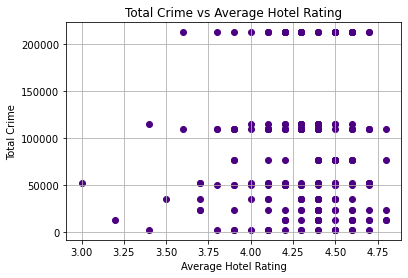

In [63]:
#Total Crime vs Hotel Rating scatter plot 
plt.scatter(rating_crime_df["Hotel Rating"], rating_crime_df["Total Crime"], marker="o", color="indigo")
plt.title("Total Crime vs Average Hotel Rating")
plt.xlabel("Average Hotel Rating")
plt.ylabel("Total Crime")
plt.savefig("TotalCrimevsHotelRating.png")
plt.grid()
plt.show()

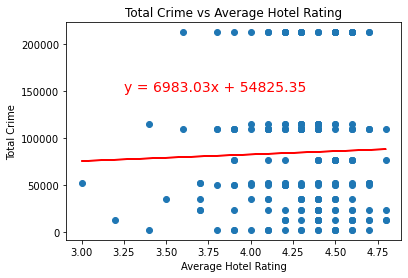

The r-squared is: 0.0009229074678504802


In [64]:
#Total Crime vs Hotel Rating linear regression
x_values = rating_crime_df["Hotel Rating"]
y_values = rating_crime_df["Total Crime"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regression, "r-")
plt.title("Total Crime vs Average Hotel Rating")
plt.xlabel("Average Hotel Rating")
plt.ylabel("Total Crime")
plt.annotate(line_equation,(3.25,150000), fontsize=14, color="red")
plt.savefig("TotalCrimevsHotelRatingLinear.png")
plt.show()

print(f"The r-squared is: {rvalue**2}")

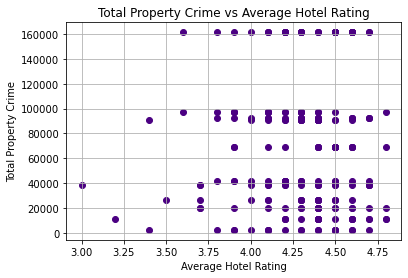

In [65]:
#Total Property Crime vs Hotel Rating scatter plot 
plt.scatter(rating_crime_df["Hotel Rating"], rating_crime_df["Total Property Crime"], marker="o", color="indigo")
plt.title("Total Property Crime vs Average Hotel Rating")
plt.xlabel("Average Hotel Rating")
plt.ylabel("Total Property Crime")
plt.savefig("PropertyCrimevsHotelRating.png")
plt.grid()
plt.show()

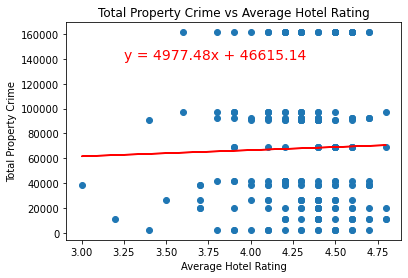

The r-squared is: 0.0007933283155911873


In [66]:
#Total Property Crime vs Hotel Rating linear regression
x_values = rating_crime_df["Hotel Rating"]
y_values = rating_crime_df["Total Property Crime"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regression, "r-")
plt.title("Total Property Crime vs Average Hotel Rating")
plt.xlabel("Average Hotel Rating")
plt.ylabel("Total Property Crime")
plt.annotate(line_equation,(3.25,140000), fontsize=14, color="red")
plt.savefig("PropertyCrimevsHotelRatingLinear.png")
plt.show()

print(f"The r-squared is: {rvalue**2}")

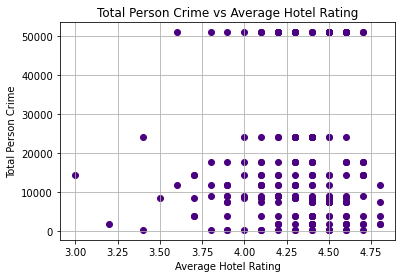

In [67]:
#Total Person Crime vs Hotel Rating scatter plot 
plt.scatter(rating_crime_df["Hotel Rating"], rating_crime_df["Total Person Crime"], marker="o", color="indigo")
plt.title("Total Person Crime vs Average Hotel Rating")
plt.xlabel("Average Hotel Rating")
plt.ylabel("Total Person Crime")
plt.savefig("PersonCrimevsHotelRating.png")
plt.grid()
plt.show()

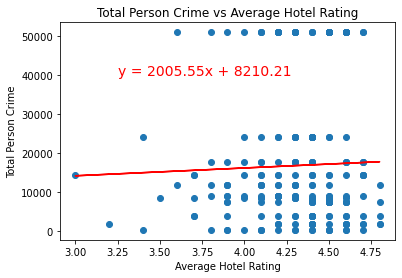

The r-squared is: 0.0012663816827335117


In [68]:
#Total Person Crime vs Hotel Rating linear regression
x_values = rating_crime_df["Hotel Rating"]
y_values = rating_crime_df["Total Person Crime"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regression, "r-")
plt.title("Total Person Crime vs Average Hotel Rating")
plt.xlabel("Average Hotel Rating")
plt.ylabel("Total Person Crime")
plt.annotate(line_equation,(3.25,40000), fontsize=14, color="red")
plt.savefig("PersonCrimevsHotelRatingLinear.png")
plt.show()

print(f"The r-squared is: {rvalue**2}")

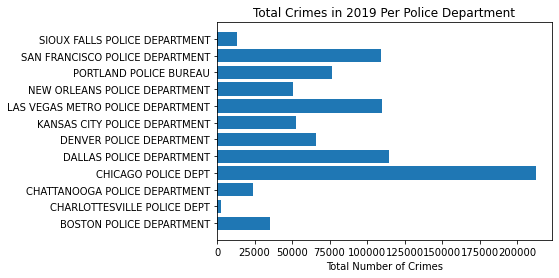

In [69]:
#Total Crimes in 2019 Per Police Department in each city
x_values = total_crime_rates["Unnamed: 0"]
y_values = total_crime_rates["Total Crime"]
plt.barh(x_values, y_values)
plt.title("Total Crimes in 2019 Per Police Department")
plt.xlabel("Total Number of Crimes")
plt.savefig("TotalCrimesperDept.png")
plt.show()

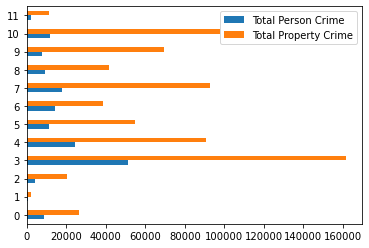

In [52]:
# #police department names on y axis
personcrime = total_crime_rates["Total Person Crime"]
propertycrime = total_crime_rates["Total Property Crime"]
# index = total_crime_rates["Unnamed: 0"]

df = pd.DataFrame({"Total Person Crime": personcrime, "Total Property Crime": propertycrime})
ax=df.plot.barh()

# total_crime_rates.plot(x=total_crime_rates["Unnamed: 0"], y=total_crime_rates[["Total Person Crime"],total_crime_rates["Total Property Crime"]], kind="bar")
# plt.show()

In [170]:
pop_offense = pd.read_csv("CSV_Files/Crime_Rates/all_crime_rates.csv")
pop_offense

,Unnamed: 0,State,ORI,"City, State",Population,Agg Assault,Arson,Auto Theft,Burglary,Homicide,...,Burglary Crime Rate,Homicide Crime Rate,Larceny Crime Rate,Property Crime Rate,Robbery Crime Rate,Sex Crimes Rate,Violent Crime Rate,Total Crime Rate,Total Person Crime Rate,Total Property Crime Rate
0,BOSTON POLICE DEPARTMENT,MA,MA0130100,"Boston city, Massachusetts",679413.0,2932,4,920,1703,42,...,250.657553,6.181807,1558.698465,1944.767027,152.926129,33.999938,630.544308,5145.323978,1255.201181,3890.122797
1,CHARLOTTESVILLE POLICE DEPT,VA,VA1020000,"Charlottesville city, Virginia",47042.0,103,5,78,122,0,...,259.342715,0.000000,1964.202202,2389.354194,46.766719,68.024319,384.762553,5507.844054,718.506866,4789.337188
2,CHATTANOOGA POLICE DEPARTMENT,TN,TN0330100,"Chattanooga city, Tennessee",177365.0,1556,25,1314,1098,33,...,619.062385,18.605700,4337.947171,5697.854706,110.506582,90.773264,1172.722916,13679.700054,2269.895413,11409.804640
3,CHICAGO POLICE DEPT,IL,ILCPD0000,"Chicago city, Illinois",2718555.0,15296,0,9081,9578,492,...,352.319523,18.097850,2283.676438,2970.033713,293.648648,64.777060,939.175408,7818.418241,1878.350815,5940.067426
4,DALLAS POLICE DEPARTMENT,TX,TXDPD0000,"Dallas city, Texas",1318806.0,6369,144,10257,9210,198,...,698.358970,15.013580,1957.224944,3433.332878,333.635121,60.433453,943.504958,8713.108676,1835.523951,6877.584724
5,DENVER POLICE DEPARTMENT,CO,CODPD0000,"Denver city, Colorado",693417.0,3474,107,5294,3967,67,...,572.094425,9.662296,2599.734359,3935.294347,173.777107,102.824130,855.473690,9528.753982,1642.734458,7886.019524
6,KANSAS CITY POLICE DEPARTMENT,MO,MOKPD0000,"Kansas City city, Missouri",481417.0,5159,160,3801,3070,150,...,637.700787,31.158019,2545.194706,3972.439694,299.740142,72.078884,1518.018682,10970.738466,2992.623858,7978.114608
7,LAS VEGAS METRO POLICE DEPARTMENT,NV,NV0020100,"Las Vegas city, Nevada",626637.0,5213,98,7311,10646,84,...,1698.910214,13.404890,4506.596323,7372.210706,337.994724,229.638531,1412.939230,17585.938909,2825.878459,14760.060450
8,NEW ORLEANS POLICE DEPARTMENT,LA,LANPD0000,"New Orleans city, Louisiana",389648.0,2608,0,2951,2143,121,...,549.983575,31.053669,4051.092268,5358.426067,259.978237,198.640825,1158.994785,13034.841703,2317.989570,10716.852133
9,PORTLAND POLICE BUREAU,OR,OR0260200,"Portland city, Oregon",639387.0,2230,252,6432,4200,29,...,656.879167,4.535594,3725.443276,5388.285968,153.115406,57.555127,606.674831,11986.637201,1170.652516,10815.984685


In [172]:
pop_offense = pop_offense.loc[pop_offense["State"] == "IL"]
pop_offense

,Unnamed: 0,State,ORI,"City, State",Population,Agg Assault,Arson,Auto Theft,Burglary,Homicide,...,Burglary Crime Rate,Homicide Crime Rate,Larceny Crime Rate,Property Crime Rate,Robbery Crime Rate,Sex Crimes Rate,Violent Crime Rate,Total Crime Rate,Total Person Crime Rate,Total Property Crime Rate
3,CHICAGO POLICE DEPT,IL,ILCPD0000,"Chicago city, Illinois",2718555.0,15296,0,9081,9578,492,...,352.319523,18.09785,2283.676438,2970.033713,293.648648,64.77706,939.175408,7818.418241,1878.350815,5940.067426


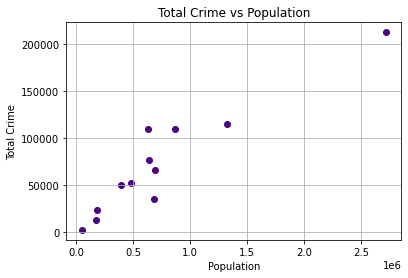

In [70]:
#scatter plot total crime vs population
plt.scatter(total_crime_rates["Population"], total_crime_rates["Total Crime"], marker="o", color="indigo")
plt.title("Total Crime vs Population")
plt.xlabel("Population")
plt.ylabel("Total Crime")
plt.savefig("TotalCrimevsPop.png")
plt.grid()
plt.show()

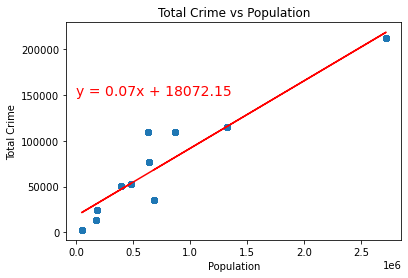

The r-squared is: 0.911714305522097


In [71]:
#Total Crime vs Population linear regression
x_values = rating_crime_df["Population"]
y_values = rating_crime_df["Total Crime"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regression, "r-")
plt.title("Total Crime vs Population")
plt.xlabel("Population")
plt.ylabel("Total Crime")
plt.annotate(line_equation,(3.25,150000), fontsize=14, color="red")
plt.savefig("TotalCrimevsPopLinear.png")
plt.show()

print(f"The r-squared is: {rvalue**2}")